In [1]:
%load_ext autoreload
%autoreload 2

Text(0, 0.5, 'Current (A)')

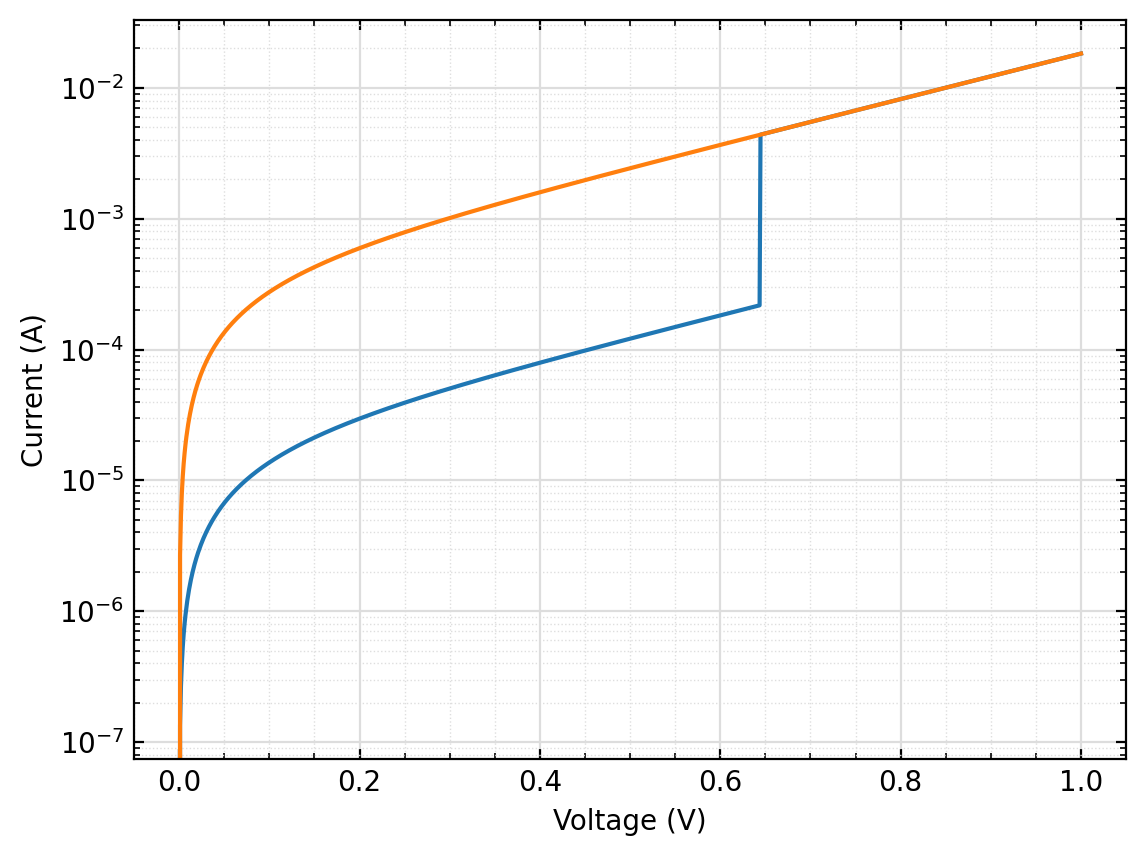

In [1]:
import numpy as np

from lib import STANFORD_MODEL_DEFAULT_PARAMS, StanfordModel, q, kb
from copy import deepcopy
from py_xavier.utils import *


params = deepcopy(STANFORD_MODEL_DEFAULT_PARAMS)

params["I0"] = 1e-3
params["g0"] = 5e-10
# params["g0"] = 10e-10
params["V0"] = 0.25
params["Vel0"] = 10.0
params["gamma0"] = 30
params["beta"] = 0.8

params["tox"] = 1.2e-8
params["gap_ini"] = 1.9e-9
params["gap_min"] = 2e-10
params["gap_max"] = 1.7e-9
params["deltaGap0"] = 1e-4
params["model_switch"] = 0

# params["T_smth"] = 500
params["T_crit"] = 400
# params["T_smth"] = 599
params["deltaGap0"] = 1e-6

# params["gap_ini"] = 19e-10
# params["deltaGap0"] = 1e-4

model = StanfordModel(params)

totat_t = 20e-1 # seconds
total_v = 1
v_step = 0.001

n_steps = int(total_v / v_step)
time_step = totat_t / n_steps
t = 0

voltage = np.concatenate((np.linspace(0, total_v, n_steps), np.linspace(total_v, 0, n_steps)))
current = np.zeros(len(voltage))    
time = np.linspace(0, totat_t, 2 * n_steps)
gap = np.zeros(len(voltage))
gap_ddt = np.zeros(len(voltage))

for idx, v in enumerate(voltage):
    t = time[idx]
    
    model.TE = v
    model.BE = 0

    i = model.step(t)

    gap[idx] = model.gap
    gap_ddt[idx] = model.gap_ddt
    current[idx] = i

    model.Itb = i

n_steps_total = 2 * n_steps

plt_figure()
setup_plt(plt)

plt.semilogy(voltage[:n_steps_total // 2], current[:n_steps_total // 2], color="tab:blue")
plt.semilogy(voltage[n_steps_total // 2:], current[n_steps_total // 2:], color="tab:orange")

plt.xlabel("Voltage (V)")
plt.ylabel("Current (A)")

# plt.show()

# plt_figure()
# plt.plot(time, voltage)

# plt_figure()

# plt.plot(time, gap_ddt)


In [6]:
kb

1.380649e-23

In [3]:
closest_idx = np.argmin(np.abs(voltage[:len(voltage)//2] - 0.544))
print(f"voltage: {voltage[closest_idx]}")
print(f"current: {current[closest_idx]}")

voltage: 0.5441360340085022
current: 4.846233101618546e-06
